In [1]:
import pandas as pd
import mio
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tag = '1012'

In [3]:
# read building heights above sea level
sl_bui = (
    mio.read_raster(f'../25k_sl_bui/{tag}_sl_bui.bil')[0]
    .replace(0, np.nan)
)

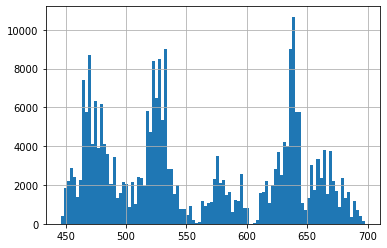

In [4]:
sl_bui.stack().hist(bins=100)

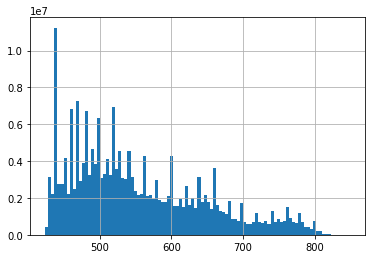

In [5]:
# read relief data
rel = mio.read_raster(f'../25k_rel/{tag}_rel.bil')[0]
rel.stack().hist(bins=100)

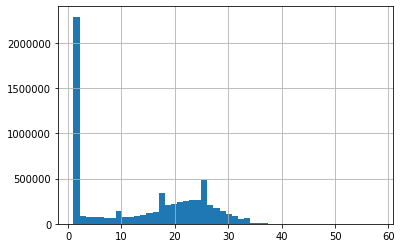

In [6]:
# read vegatation heights over ground
veg = mio.read_raster(f'../25k_veg/veg_{tag}.bil')[0]
veg[veg>0].stack().hist(bins=50)

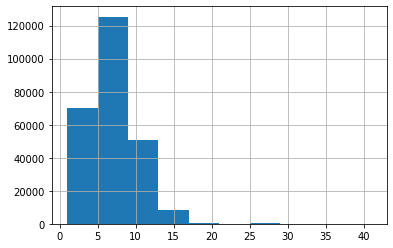

In [7]:
# calc builings over ground
bui = (sl_bui - rel).fillna(0)
bui[bui>0].stack().hist()

In [9]:
# create clutter classes 1 = vegetation, 2 = buildings
cla = np.maximum(2 * (bui>0).astype(int) , (veg>0).astype(int) )

In [10]:
bui.stack().value_counts()[0:10]

0.0     209739331
6.0         34131
5.0         33552
7.0         31698
4.0         28088
8.0         26015
3.0         21883
9.0         20270
10.0        14397
dtype: int64

In [11]:
cla.stack().value_counts()

0    203162653
1      6581844
2       255503
dtype: int64

In [12]:
mio.write_raster(cla.astype('uint8'), f'../25k_cl_class/{tag}_cl_class.bil')

In [13]:
# create clutter heights layer
hei = np.maximum(bui , veg )

In [14]:
mio.write_raster(hei.astype('uint8'), f'../25k_cl_height/{tag}_cl_height.bil')